In [1]:
#importing libraries
import pandas as pd
import numpy as np

#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#model building libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)



In [2]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


The columns I personally find relevant and am interested in:

6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 non-null   float64
 10  Last Activity    
 14  What is your current occupation                6550 non-null   object 
 15  What matters most to you in choosing a course  6531 non-null   object
 23  Receive More Updates About Our Courses         9240 non-null   object 
 24  Tags                                           5887 non-null   object 
 25  Lead Quality 
 36  Last Notable Activity                          9240 non-null   object  

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,NaN,select,select,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,interested_in_other_courses,low_in_relevance,no,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic_search,no,no,0,5.0,674,2.5,email_opened,india,select,select,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,ringing,NaN,no,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email_opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,email_opened,india,business_administration,select,student,better_career_prospects,no,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,no,no,potential_lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email_opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,unreachable,india,media_and_advertising,word_of_mouth,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,ringing,not_sure,no,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing_page_submission,google,no,no,1,2.0,1428,1.0,converted_to_lead,india,select,other,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,no,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [7]:
df.lead_quality.value_counts()

lead_quality
might_be             1560
not_sure             1092
high_in_relevance     637
worst                 601
low_in_relevance      583
Name: count, dtype: int64

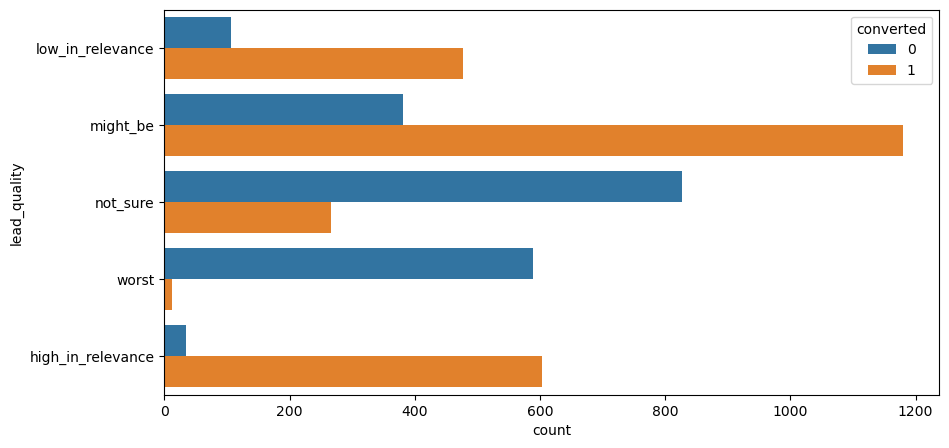

In [8]:
# Comparing Lead converted and Lead quality
plt.figure(figsize=(10,5))
sns.countplot(y='lead_quality',hue='converted',data=df)
plt.show()

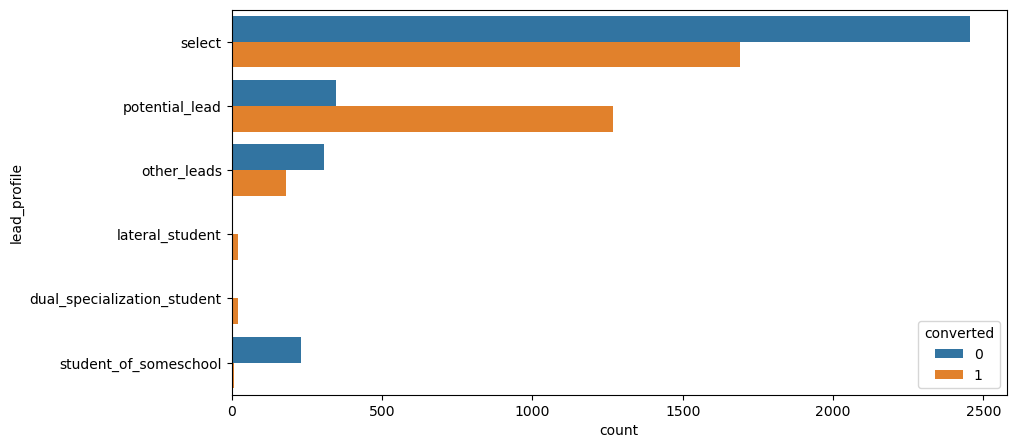

In [9]:
# Comparing Lead converted and Lead Profile
plt.figure(figsize=(10,5))
sns.countplot(y='lead_profile',hue='converted',data=df)
plt.show()

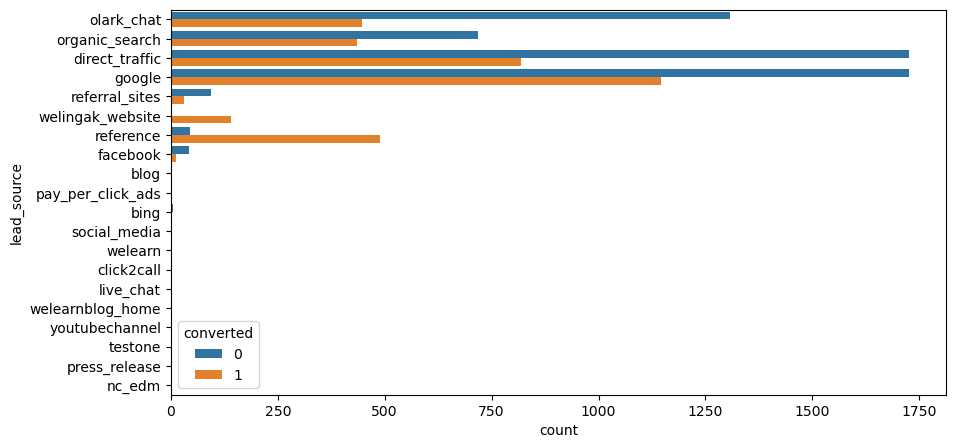

In [10]:
# Comparing Lead converted and Lead source
plt.figure(figsize=(10,5)) 
sns.countplot(y='lead_source',hue='converted',data=df)
plt.show()

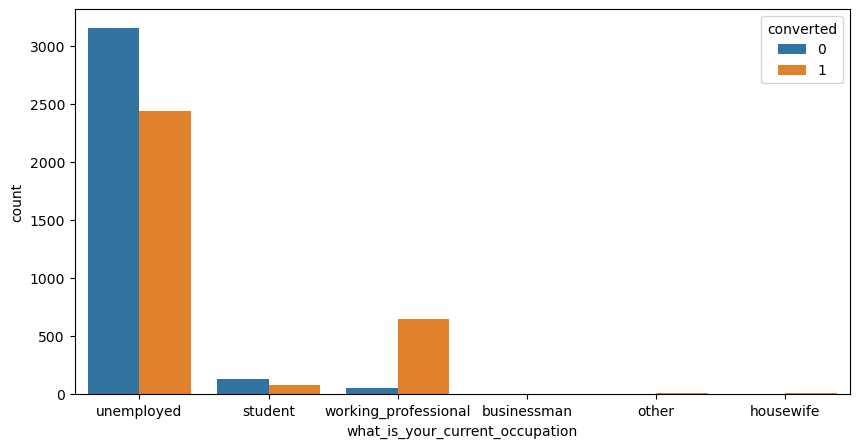

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'what_is_your_current_occupation',hue='converted',data=df)
plt.show()          

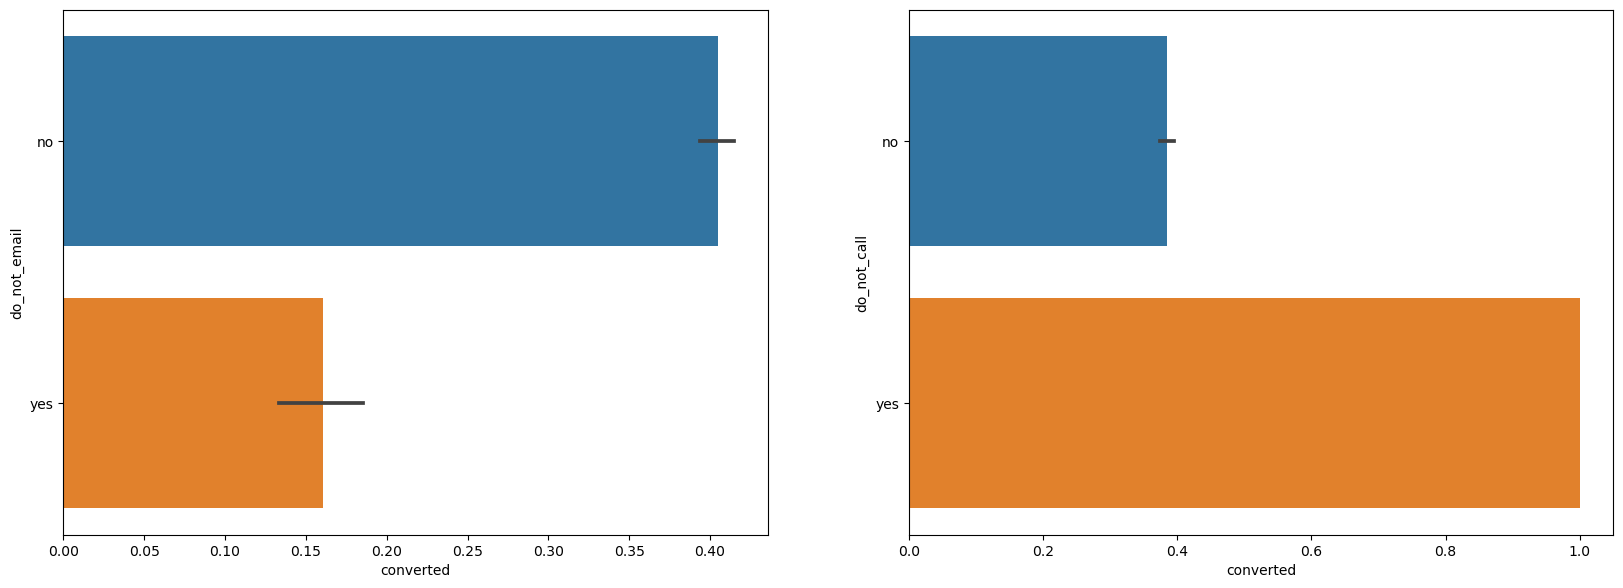

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x='converted', y='do_not_email',data=df)
           
plt.subplot(2,2,2)
sns.barplot (x='converted',y= 'do_not_call', data=df)  

plt.show()

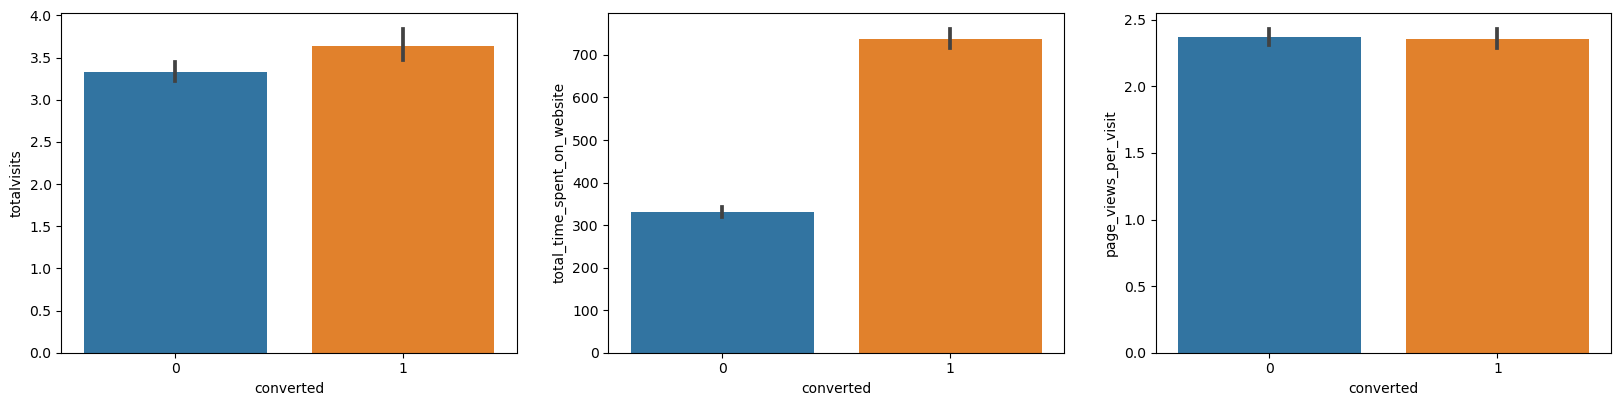

In [13]:
 #Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'converted', y = 'totalvisits', data = df)

plt.subplot(3,3,2)
sns.barplot(x = 'converted', y = 'total_time_spent_on_website',data = df)

plt.subplot(3,3,3)
sns.barplot(x = 'converted', y = 'page_views_per_visit',data = df)

plt.show()

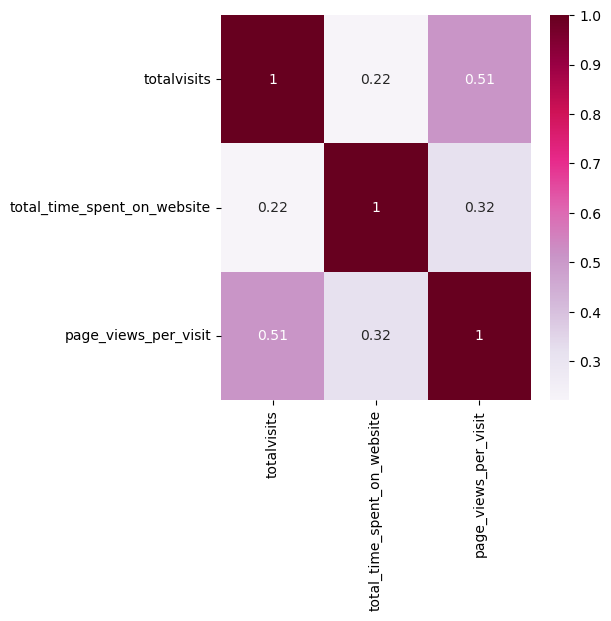

In [14]:
plt.figure(figsize = (5,5))
sns.heatmap(df[['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit']].corr(), cmap="PuRd", annot = True)
plt.show()

# Data Cleaning ,understanding and Imputation

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [16]:
#Replace "Select" category with null values

df.replace('select', np.NAN, inplace=True)
df.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,NaN,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,interested_in_other_courses,low_in_relevance,no,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic_search,no,no,0,5.0,674,2.5,email_opened,india,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,ringing,NaN,no,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email_opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,email_opened,india,business_administration,NaN,student,better_career_prospects,no,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,no,no,potential_lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email_opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,unreachable,india,media_and_advertising,word_of_mouth,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,ringing,not_sure,no,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing_page_submission,google,no,no,1,2.0,1428,1.0,converted_to_lead,india,NaN,other,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,no,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [17]:
df.isnull().sum().sort_values(ascending=False)

how_did_you_hear_about_x_education               7250
lead_profile                                     6855
lead_quality                                     4767
asymmetrique_profile_score                       4218
asymmetrique_activity_score                      4218
asymmetrique_activity_index                      4218
asymmetrique_profile_index                       4218
city                                             3669
specialization                                   3380
tags                                             3353
what_matters_most_to_you_in_choosing_a_course    2709
what_is_your_current_occupation                  2690
country                                          2461
page_views_per_visit                              137
totalvisits                                       137
last_activity                                     103
lead_source                                        36
receive_more_updates_about_our_courses              0
i_agree_to_pay_the_amount_th

In [18]:
100*df.isna().mean().sort_values(ascending=False)

how_did_you_hear_about_x_education               78.463203
lead_profile                                     74.188312
lead_quality                                     51.590909
asymmetrique_profile_score                       45.649351
asymmetrique_activity_score                      45.649351
asymmetrique_activity_index                      45.649351
asymmetrique_profile_index                       45.649351
city                                             39.707792
specialization                                   36.580087
tags                                             36.287879
what_matters_most_to_you_in_choosing_a_course    29.318182
what_is_your_current_occupation                  29.112554
country                                          26.634199
page_views_per_visit                              1.482684
totalvisits                                       1.482684
last_activity                                     1.114719
lead_source                                       0.3896

In [19]:
#Eliminating columns with high missing values upto 40%
cutoff=40
cols_to_drop=list(df.columns[100*df.isnull().mean()>cutoff])
cols_to_drop

['how_did_you_hear_about_x_education',
 'lead_quality',
 'lead_profile',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score']

In [20]:
cols_to_drop.extend(['prospect_id', 'lead_number','country', 'receive_more_updates_about_our_courses',
              'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
              'i_agree_to_pay_the_amount_through_cheque','a_free_copy_of_mastering_the_interview'])

In [21]:
cols_to_drop

['how_did_you_hear_about_x_education',
 'lead_quality',
 'lead_profile',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score',
 'prospect_id',
 'lead_number',
 'country',
 'receive_more_updates_about_our_courses',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview']

In [22]:
cols_to_drop.extend(['tags','last_activity','last_notable_activity'])

In [23]:
cols_to_drop

['how_did_you_hear_about_x_education',
 'lead_quality',
 'lead_profile',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score',
 'prospect_id',
 'lead_number',
 'country',
 'receive_more_updates_about_our_courses',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'tags',
 'last_activity',
 'last_notable_activity']

In [24]:
df2 = df.drop(cols_to_drop, axis=1)

In [25]:
df2.shape

(9240, 19)

In [26]:
df2.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,specialization,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,city
0,api,olark_chat,no,no,0,0.0,0,0.0,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,NaN
1,api,organic_search,no,no,0,5.0,674,2.5,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,NaN
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,business_administration,student,better_career_prospects,no,no,no,no,no,no,no,mumbai
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,media_and_advertising,unemployed,better_career_prospects,no,no,no,no,no,no,no,mumbai
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,mumbai


In [27]:
100*df2.isnull().mean().sort_values(ascending=False)

city                                             39.707792
specialization                                   36.580087
what_matters_most_to_you_in_choosing_a_course    29.318182
what_is_your_current_occupation                  29.112554
totalvisits                                       1.482684
page_views_per_visit                              1.482684
lead_source                                       0.389610
converted                                         0.000000
total_time_spent_on_website                       0.000000
do_not_call                                       0.000000
do_not_email                                      0.000000
search                                            0.000000
magazine                                          0.000000
newspaper_article                                 0.000000
x_education_forums                                0.000000
newspaper                                         0.000000
digital_advertisement                             0.0000

In [28]:
df2.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,specialization,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,city
0,api,olark_chat,no,no,0,0.0,0,0.0,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,NaN
1,api,organic_search,no,no,0,5.0,674,2.5,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,NaN
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,business_administration,student,better_career_prospects,no,no,no,no,no,no,no,mumbai
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,media_and_advertising,unemployed,better_career_prospects,no,no,no,no,no,no,no,mumbai
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,mumbai


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_origin                                    9240 non-null   object 
 1   lead_source                                    9204 non-null   object 
 2   do_not_email                                   9240 non-null   object 
 3   do_not_call                                    9240 non-null   object 
 4   converted                                      9240 non-null   int64  
 5   totalvisits                                    9103 non-null   float64
 6   total_time_spent_on_website                    9240 non-null   int64  
 7   page_views_per_visit                           9103 non-null   float64
 8   specialization                                 5860 non-null   object 
 9   what_is_your_current_occupation                6550 

In [30]:
100*df2.isnull().mean().sort_values(ascending=False)

city                                             39.707792
specialization                                   36.580087
what_matters_most_to_you_in_choosing_a_course    29.318182
what_is_your_current_occupation                  29.112554
totalvisits                                       1.482684
page_views_per_visit                              1.482684
lead_source                                       0.389610
converted                                         0.000000
total_time_spent_on_website                       0.000000
do_not_call                                       0.000000
do_not_email                                      0.000000
search                                            0.000000
magazine                                          0.000000
newspaper_article                                 0.000000
x_education_forums                                0.000000
newspaper                                         0.000000
digital_advertisement                             0.0000

In [31]:
100*df2.city.value_counts(normalize=True,dropna=False)

city
NaN                            39.707792
mumbai                         34.870130
thane_&_outskirts               8.138528
other_cities                    7.424242
other_cities_of_maharashtra     4.945887
other_metro_cities              4.112554
tier_ii_cities                  0.800866
Name: proportion, dtype: float64

In [32]:
df2.city.fillna(df2.city.mode()[0],inplace=True)

In [33]:
#Checking the values of Specialization column in percentage
100*df2.specialization.value_counts(normalize=True,dropna=False)

specialization
NaN                                  36.580087
finance_management                   10.562771
human_resource_management             9.177489
marketing_management                  9.069264
operations_management                 5.443723
business_administration               4.361472
it_projects_management                3.961039
supply_chain_management               3.777056
banking,_investment_and_insurance     3.658009
travel_and_tourism                    2.196970
media_and_advertising                 2.196970
international_business                1.926407
healthcare_management                 1.720779
hospitality_management                1.233766
e-commerce                            1.212121
retail_management                     1.082251
rural_and_agribusiness                0.790043
e-business                            0.616883
services_excellence                   0.432900
Name: proportion, dtype: float64

In [34]:
#imputing the null values in the Specialization column with the mode
df2.specialization.fillna(df2.specialization.mode()[0],inplace=True)

In [35]:
df2.what_matters_most_to_you_in_choosing_a_course.value_counts(normalize=True,dropna= False)


what_matters_most_to_you_in_choosing_a_course
better_career_prospects      0.706494
NaN                          0.293182
flexibility_&_convenience    0.000216
other                        0.000108
Name: proportion, dtype: float64

In [36]:
df2.fillna(df2.what_matters_most_to_you_in_choosing_a_course.mode()[0],inplace=True)

In [37]:
df2.what_matters_most_to_you_in_choosing_a_course.value_counts(normalize=True,dropna= False)

what_matters_most_to_you_in_choosing_a_course
better_career_prospects      0.999675
flexibility_&_convenience    0.000216
other                        0.000108
Name: proportion, dtype: float64

In [38]:
df2.drop(['what_matters_most_to_you_in_choosing_a_course'], axis=1, inplace=True)


In [39]:
df2.what_is_your_current_occupation.value_counts(normalize=True,dropna=False)

what_is_your_current_occupation
unemployed                 0.606061
better_career_prospects    0.291126
working_professional       0.076407
student                    0.022727
other                      0.001732
housewife                  0.001082
businessman                0.000866
Name: proportion, dtype: float64

In [40]:
df2.fillna(df2.what_is_your_current_occupation.mode()[0],inplace=True)

In [41]:
100*df2.isnull().mean().sort_values(ascending=False)

lead_origin                        0.0
lead_source                        0.0
through_recommendations            0.0
digital_advertisement              0.0
newspaper                          0.0
x_education_forums                 0.0
newspaper_article                  0.0
magazine                           0.0
search                             0.0
what_is_your_current_occupation    0.0
specialization                     0.0
page_views_per_visit               0.0
total_time_spent_on_website        0.0
totalvisits                        0.0
converted                          0.0
do_not_call                        0.0
do_not_email                       0.0
city                               0.0
dtype: float64

# Model Preperation

In [42]:
#separating the data into numerical and categorical variables
numeric_data = df2.select_dtypes(include=[np.number])


numeric_data


,converted,total_time_spent_on_website
0,0,0
1,0,674
2,1,1532
3,0,305
4,1,1428
...,...,...
9235,1,1845
9236,0,238
9237,0,199
9238,1,499


In [45]:
categorical_data = df2.select_dtypes(exclude=[np.number])

categorical_data

,lead_origin,lead_source,do_not_email,do_not_call,totalvisits,page_views_per_visit,specialization,what_is_your_current_occupation,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,city
0,api,olark_chat,no,no,0.0,0.0,finance_management,unemployed,no,no,no,no,no,no,no,mumbai
1,api,organic_search,no,no,5.0,2.5,finance_management,unemployed,no,no,no,no,no,no,no,mumbai
2,landing_page_submission,direct_traffic,no,no,2.0,2.0,business_administration,student,no,no,no,no,no,no,no,mumbai
3,landing_page_submission,direct_traffic,no,no,1.0,1.0,media_and_advertising,unemployed,no,no,no,no,no,no,no,mumbai
4,landing_page_submission,google,no,no,2.0,1.0,finance_management,unemployed,no,no,no,no,no,no,no,mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing_page_submission,direct_traffic,yes,no,8.0,2.67,it_projects_management,unemployed,no,no,no,no,no,no,no,mumbai
9236,landing_page_submission,direct_traffic,no,no,2.0,2.0,media_and_advertising,unemployed,no,no,no,no,no,no,no,mumbai
9237,landing_page_submission,direct_traffic,yes,no,2.0,2.0,business_administration,unemployed,no,no,no,no,no,no,no,mumbai
9238,landing_page_submission,google,no,no,3.0,3.0,human_resource_management,better_career_prospects,no,no,no,no,no,no,no,other_metro_cities


In [46]:
dummy = pd.get_dummies(df2[['lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'specialization', 'what_is_your_current_occupation']], drop_first=True).astype(int)

dummy.head()


,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_bing,lead_source_blog,lead_source_click2call,lead_source_direct_traffic,lead_source_facebook,lead_source_google,lead_source_live_chat,lead_source_nc_edm,lead_source_olark_chat,lead_source_organic_search,lead_source_pay_per_click_ads,lead_source_press_release,lead_source_reference,lead_source_referral_sites,lead_source_social_media,lead_source_testone,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak_website,lead_source_youtubechannel,do_not_email_yes,do_not_call_yes,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_international_business,specialization_it_projects_management,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,what_is_your_current_occupation_businessman,what_is_your_current_occupation_housewife,what_is_your_current_occupation_other,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working_professional
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
# Adding dummy variables dataset 'dummy' to original dataset 'lead_df1':-
df3= pd.concat([dummy,df2],axis = 1)
df3.head()

,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_bing,lead_source_blog,lead_source_click2call,lead_source_direct_traffic,lead_source_facebook,lead_source_google,lead_source_live_chat,lead_source_nc_edm,lead_source_olark_chat,lead_source_organic_search,lead_source_pay_per_click_ads,lead_source_press_release,lead_source_reference,lead_source_referral_sites,lead_source_social_media,lead_source_testone,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak_website,lead_source_youtubechannel,do_not_email_yes,do_not_call_yes,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_international_business,specialization_it_projects_management,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,what_is_your_current_occupation_businessman,what_is_your_current_occupation_housewife,what_is_your_current_occupation_other,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working_professional,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,specialization,what_is_your_current_occupation,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,city
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,api,olark_chat,no,no,0,0.0,0,0.0,finance_management,unemployed,no,no,no,no,no,no,no,mumbai
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,api,organic_search,no,no,0,5.0,674,2.5,finance_management,unemployed,no,no,no,no,no,no,no,mumbai
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,business_administration,student,no,no,no,no,no,no,no,mumbai
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,media_and_advertising,unemployed,no,no,no,no,no,no,no,mumbai
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,landing_page_submission,google,no,no,1,2.0,1428,1.0,finance_management,unemployed,no,no,no,no,no,no,no,mumbai


In [49]:
df3.drop(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'specialization', 'what_is_your_current_occupation'],axis=1,inplace=True)

In [50]:
df3.shape


(9240, 61)

In [51]:
# Importing required library to split data:-

from sklearn.model_selection import train_test_split

In [52]:
# Putting feature variable to X:-

X = df3.drop(['converted'], axis=1)

# Displaying head :-

X.head()

,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_bing,lead_source_blog,lead_source_click2call,lead_source_direct_traffic,lead_source_facebook,lead_source_google,lead_source_live_chat,lead_source_nc_edm,lead_source_olark_chat,lead_source_organic_search,lead_source_pay_per_click_ads,lead_source_press_release,lead_source_reference,lead_source_referral_sites,lead_source_social_media,lead_source_testone,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak_website,lead_source_youtubechannel,do_not_email_yes,do_not_call_yes,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_international_business,specialization_it_projects_management,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,what_is_your_current_occupation_businessman,what_is_your_current_occupation_housewife,what_is_your_current_occupation_other,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working_professional,totalvisits,total_time_spent_on_website,page_views_per_visit,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,city
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0.0,no,no,no,no,no,no,no,mumbai
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.0,674,2.5,no,no,no,no,no,no,no,mumbai
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,1532,2.0,no,no,no,no,no,no,no,mumbai
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,305,1.0,no,no,no,no,no,no,no,mumbai
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.0,1428,1.0,no,no,no,no,no,no,no,mumbai


In [53]:
# Putting response variable to y:-

y = df3['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [54]:
# Splitting the data into train and test of 70:30 ratio:-

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [55]:
# Checking shape of 'X_train' dataset after splitting:-

X_train.shape

(6468, 60)

In [56]:
# Checking shape of 'X_test' dataset after splitting:-

X_test.shape

(2772, 60)

In [57]:
# Verifying info of data set after splitting:-

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   lead_origin_landing_page_submission                   9240 non-null   int32 
 1   lead_origin_lead_add_form                             9240 non-null   int32 
 2   lead_origin_lead_import                               9240 non-null   int32 
 3   lead_origin_quick_add_form                            9240 non-null   int32 
 4   lead_source_bing                                      9240 non-null   int32 
 5   lead_source_blog                                      9240 non-null   int32 
 6   lead_source_click2call                                9240 non-null   int32 
 7   lead_source_direct_traffic                            9240 non-null   int32 
 8   lead_source_facebook                                  9240 non-null 

## Step 6: Feature Scaling

In [58]:
##Importing required library for scaling :-

from sklearn.preprocessing import StandardScaler